In [1]:
import cv2
import numpy as np
from superpoint.datasets.synthetic_shapes import SyntheticShapes
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

ModuleNotFoundError: No module named 'superpoint'

# Synthetic Shapes - Photometric and Homographic data augmentation

In [2]:
config = {
    'on-the-fly': True,
    'preprocessing': {
        'resize': [120, 160],
        'blur_size': 21,
    },
    'augmentation' : {
        'photometric': {
            'enable': True,
            'primitives': [
                'random_brightness', 'random_contrast', 'additive_speckle_noise',
                'additive_gaussian_noise', 'additive_shade', 'motion_blur'],
            'params': {
                'random_brightness': {'max_abs_change': 75},
                'random_contrast': {'strength_range': [0.3, 1.8]},
                'additive_gaussian_noise': {'stddev_range': [0, 15]},
                'additive_speckle_noise': {'prob_range': [0, 0.0035]},
                'additive_shade': {'transparency_range': [-.5, .8], 'kernel_size_range': [50, 100]},
                'motion_blur': {'max_kernel_size': 7},
            }
        },
        'homographic': {
            'enable': True,
            'params': {
                'translation': True,
                'rotation': True,
                'scaling': True,
                'perspective': True,
                'scaling_amplitude': 0.2,
                'perspective_amplitude_x': 0.2,
                'perspective_amplitude_y': 0.2,
                'patch_ratio': 0.8,
                'max_angle': 1.57,
                'allow_artifacts': True,
                'translation_overflow': 0.05,
            },
            'valid_border_margin': 3,
        }
    }
}
dataset = SyntheticShapes(**config)
data = dataset.get_training_set()

In [3]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)
def draw_overlay(img, mask, color=[0, 0, 255], op=0.5):
    img[np.where(mask)] = img[np.where(mask)]*(1-op) + np.array(color)*op
def display(d):
    img = draw_keypoints(d['image'][..., 0], np.where(d['keypoint_map']), (0, 255, 0))
    draw_overlay(img, np.logical_not(d['valid_mask']))
    return img

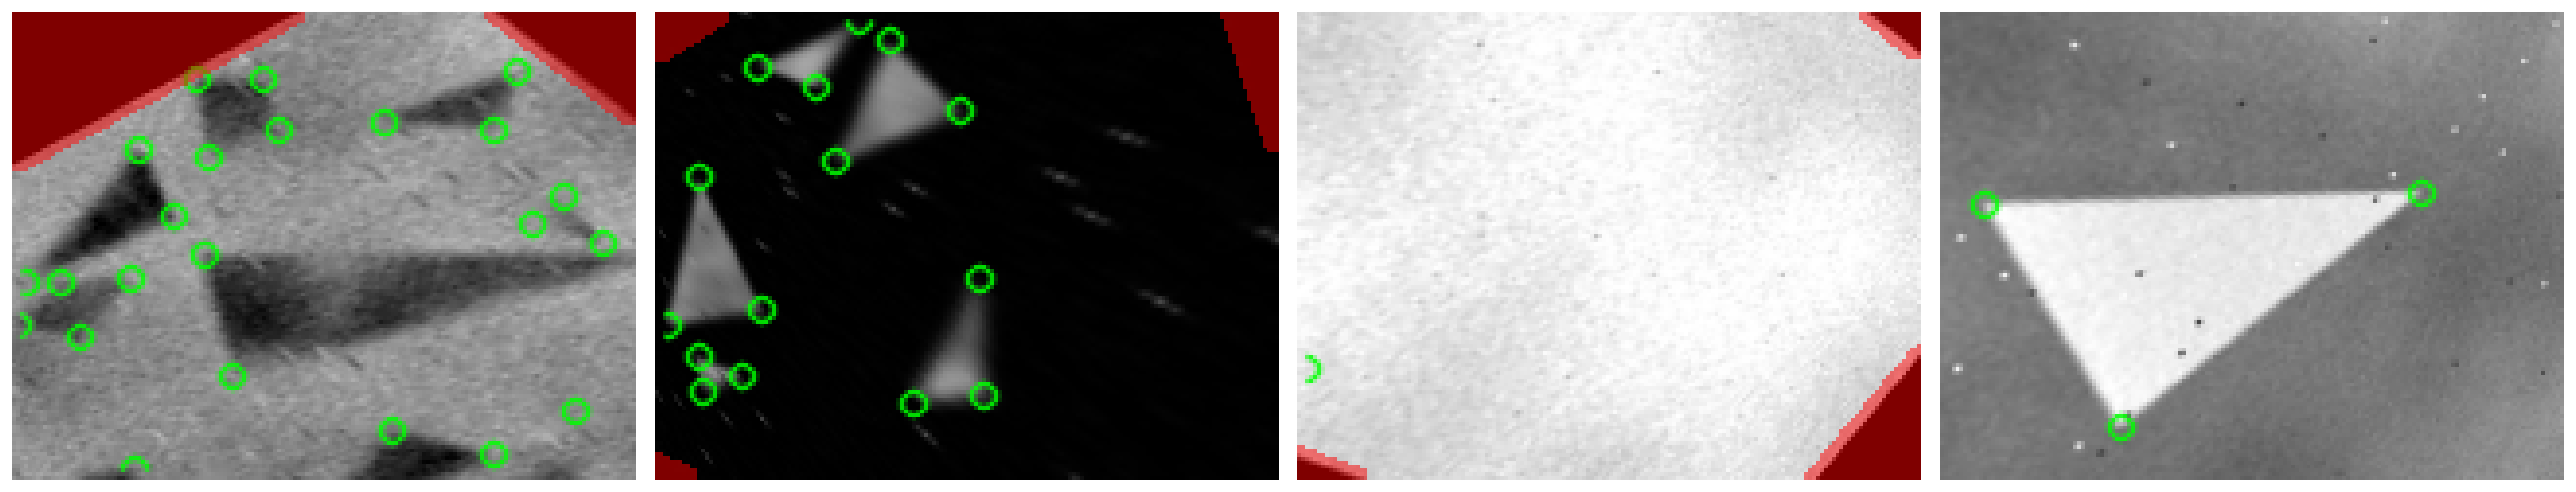

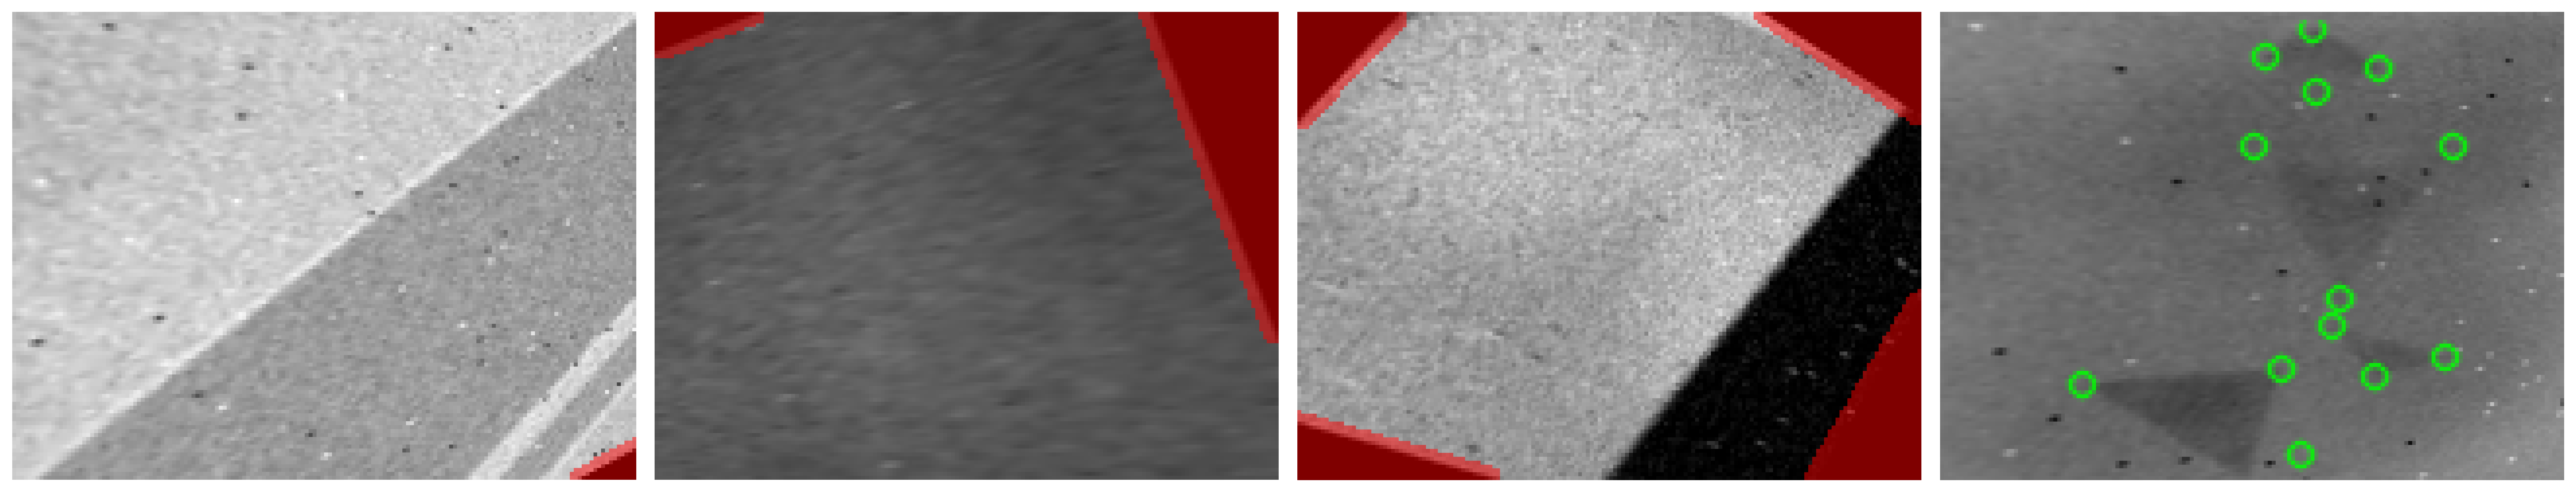

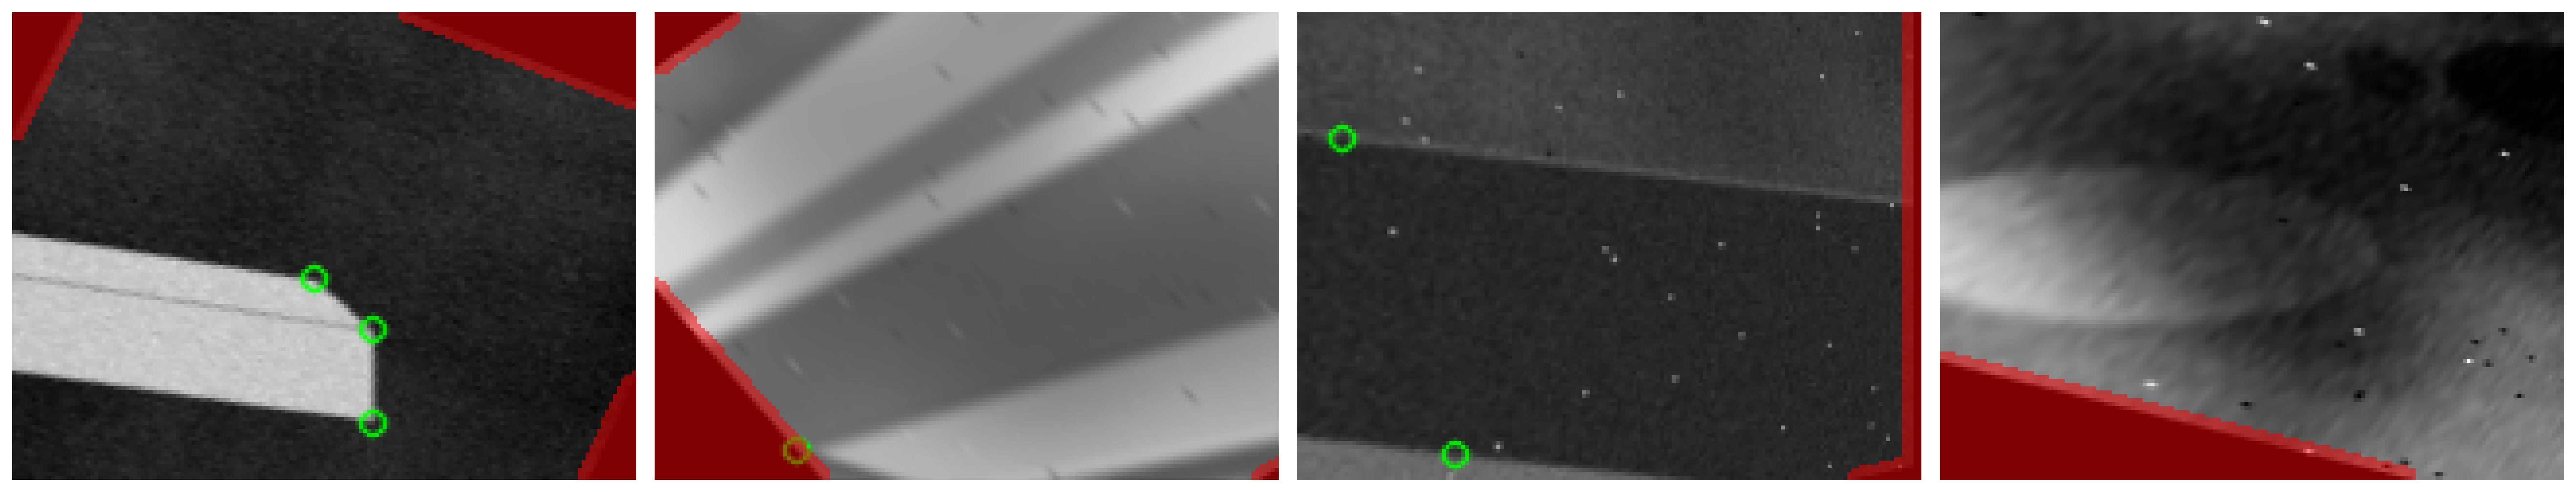

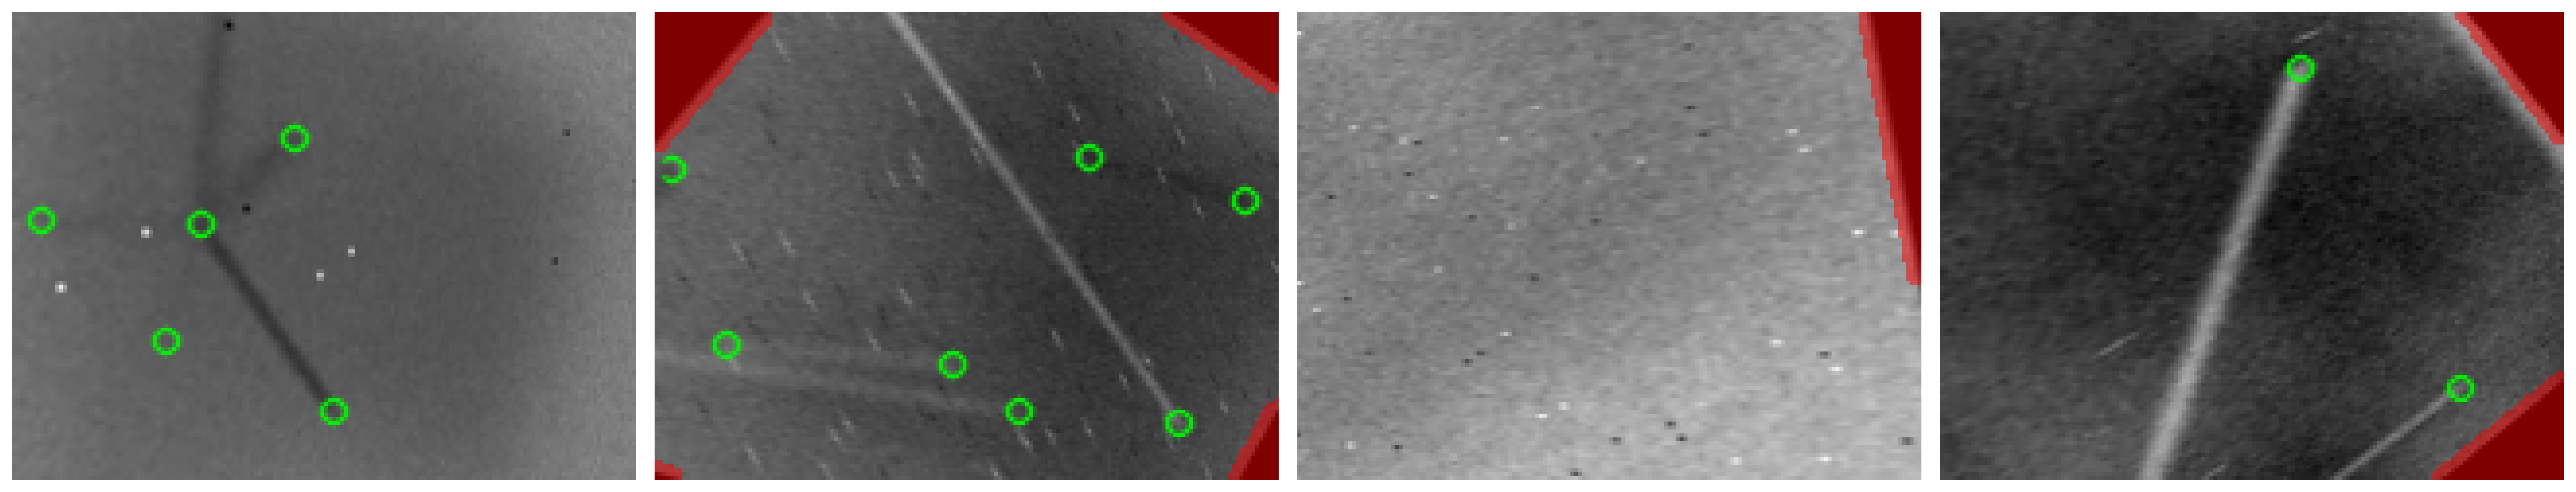

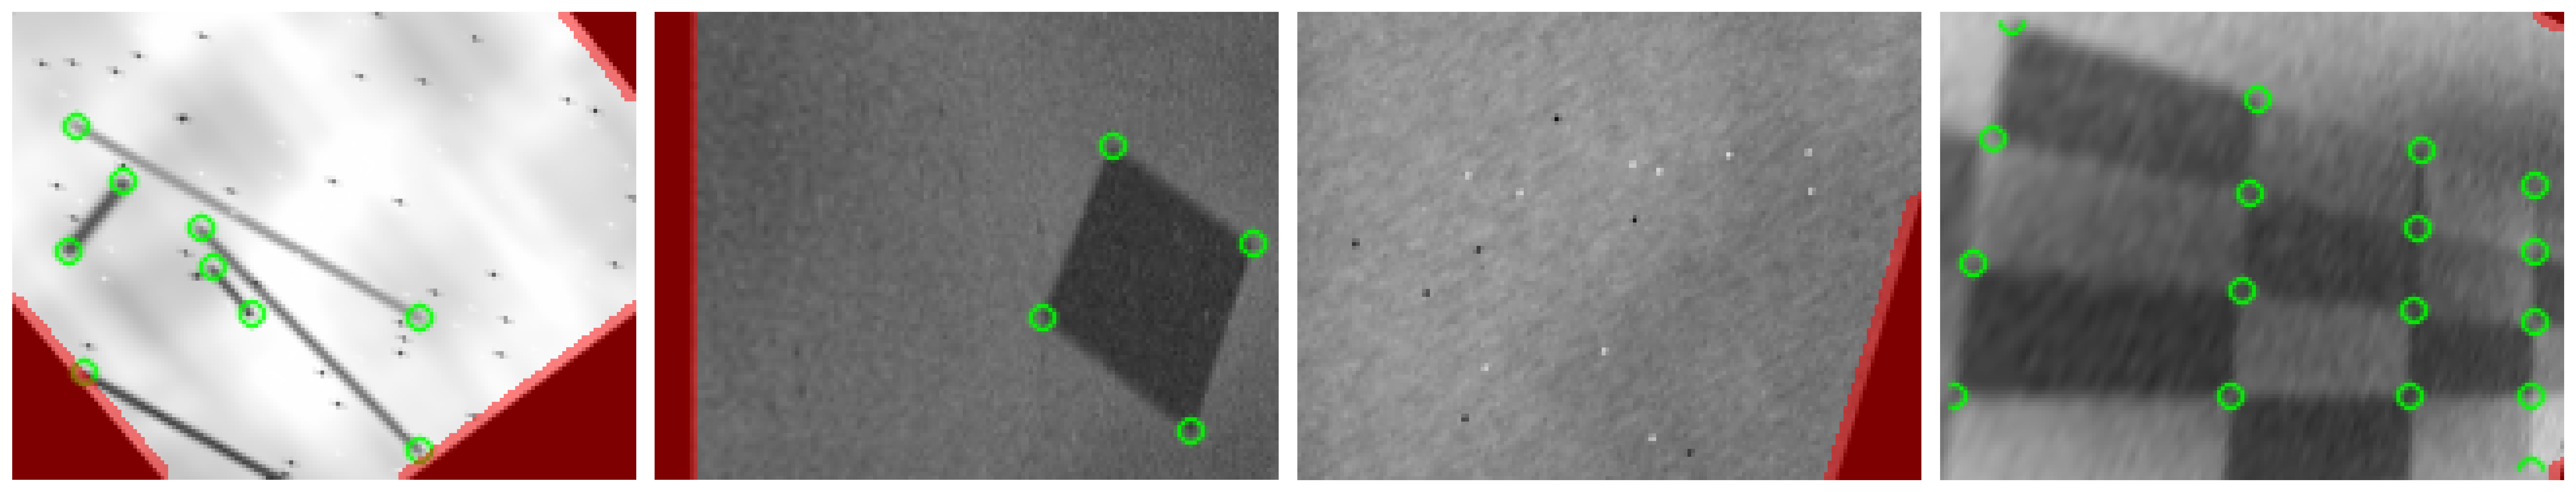

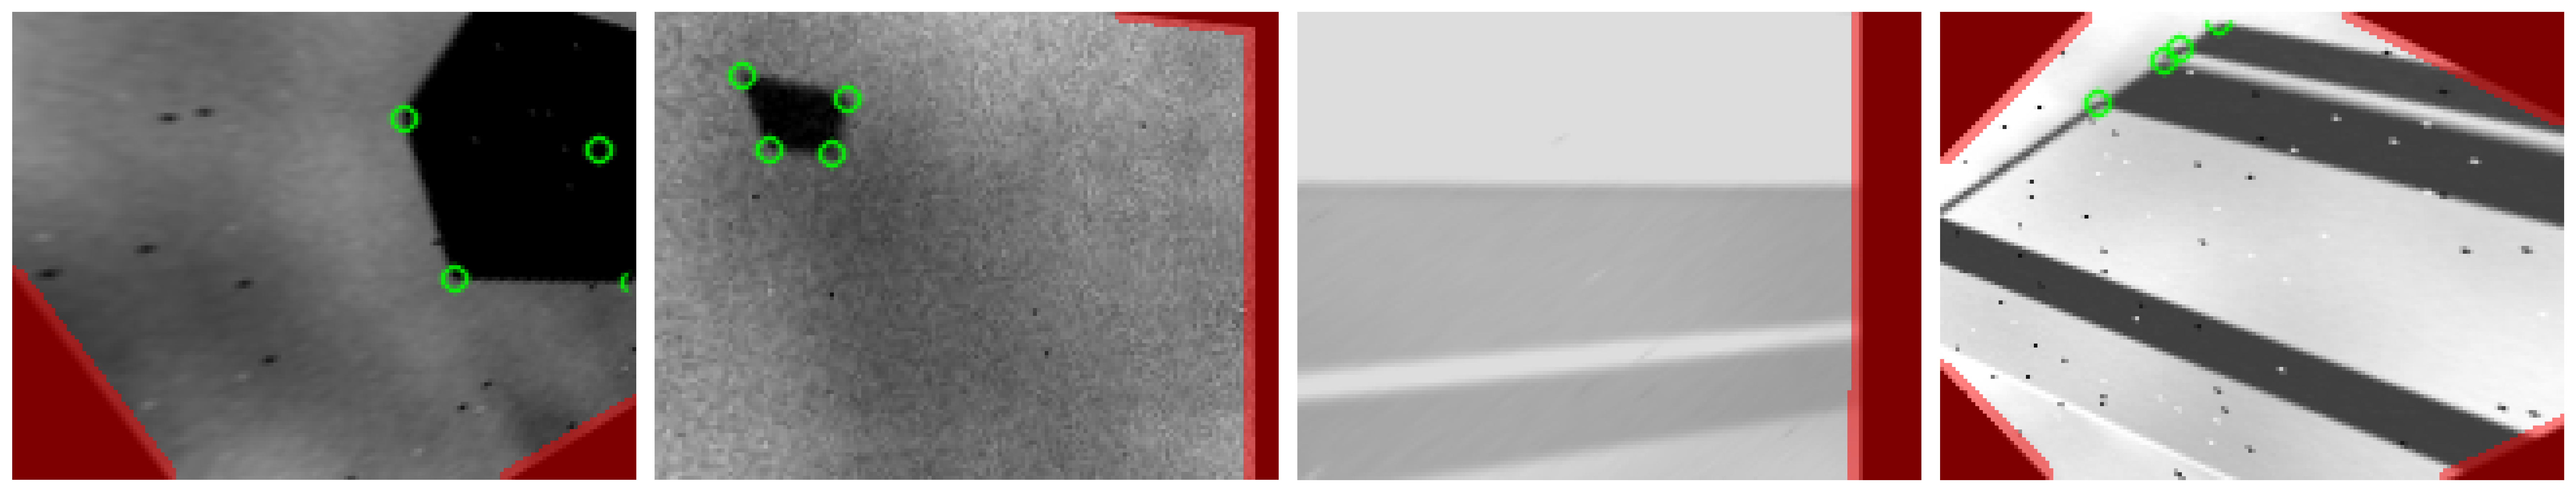

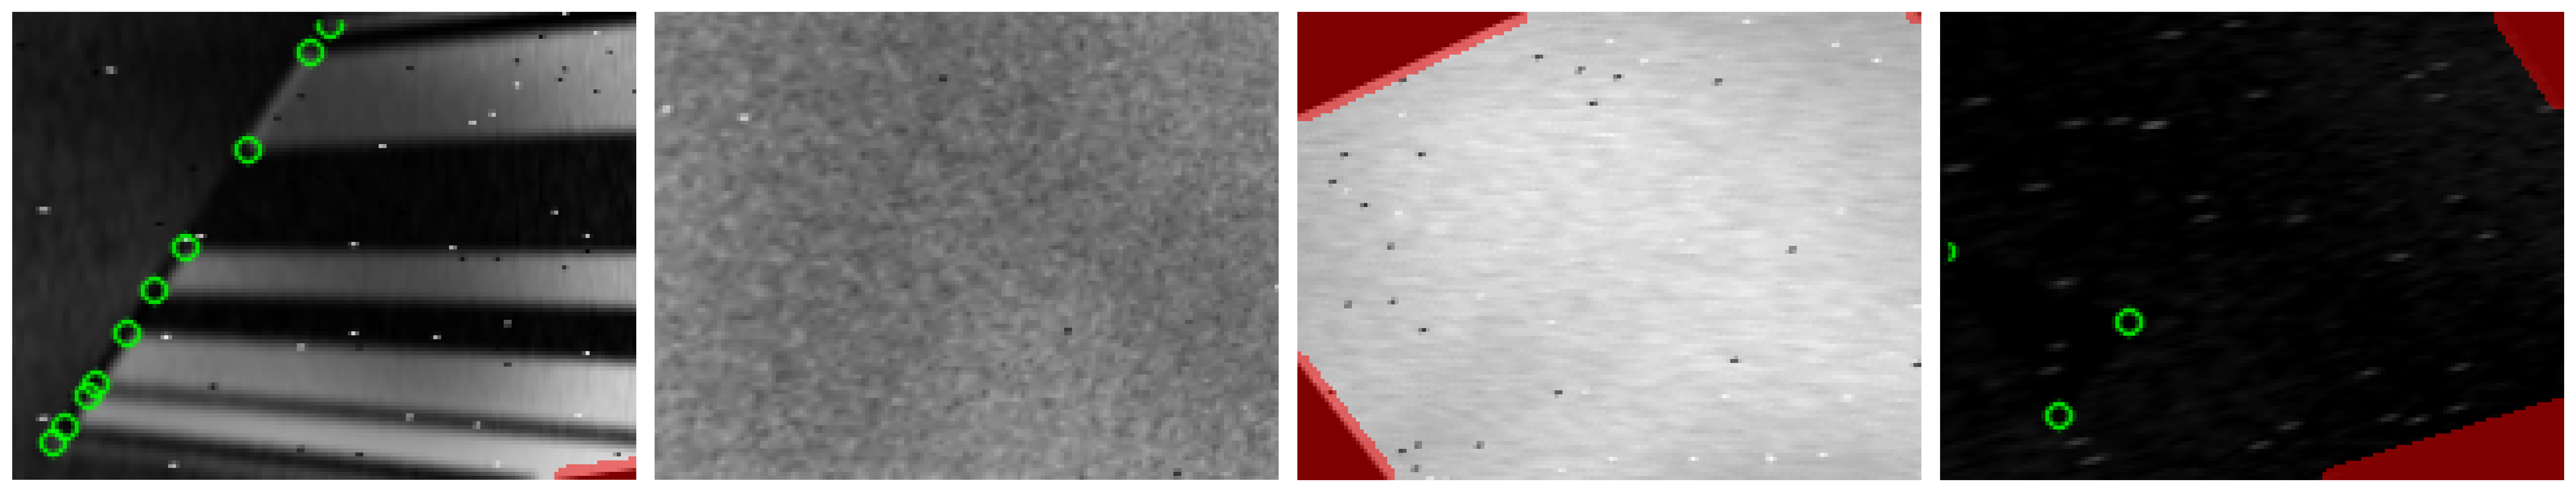

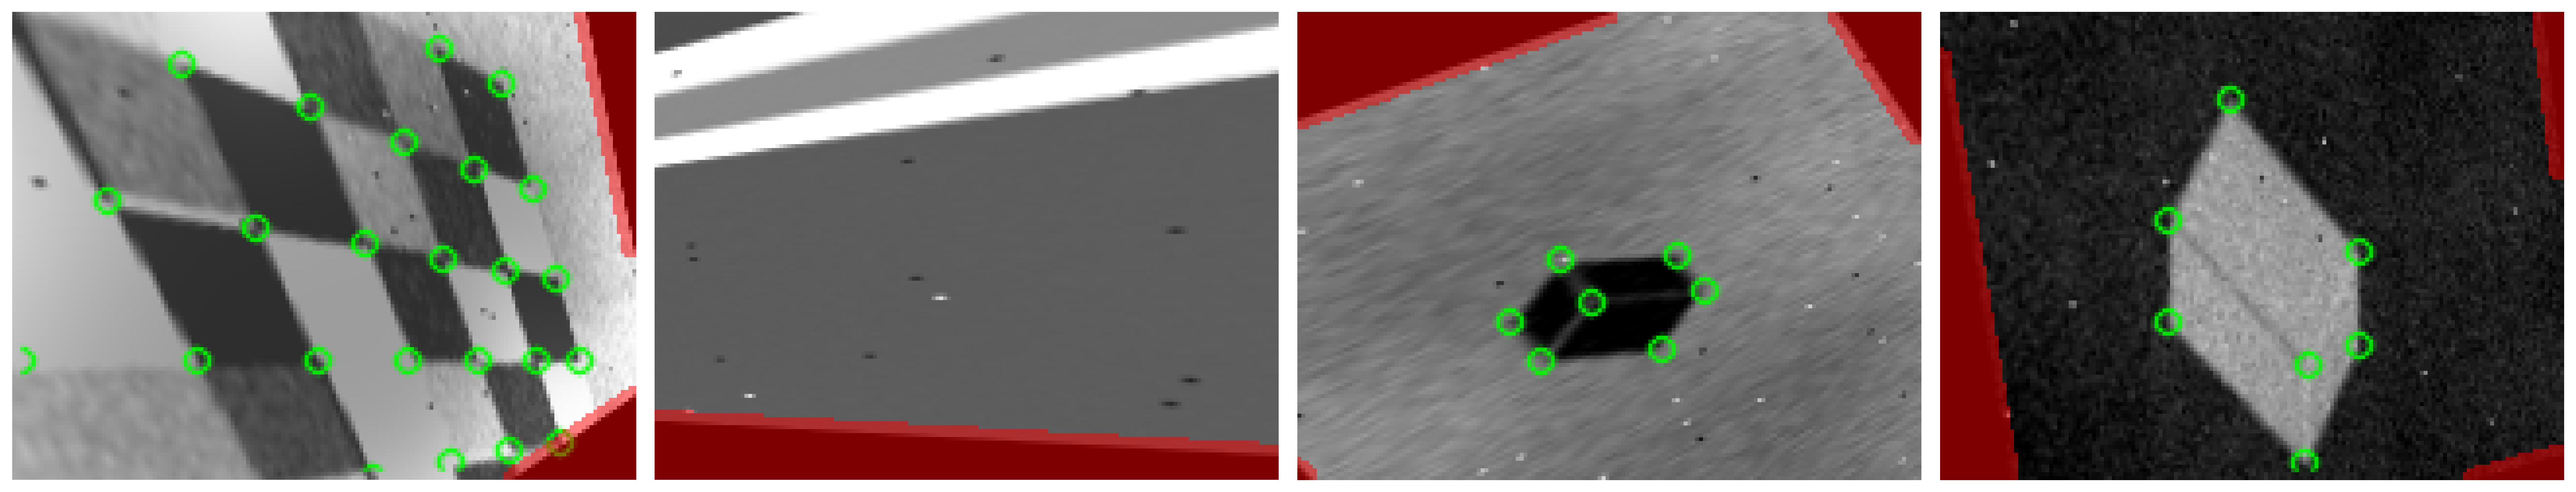

In [4]:
for i in range(8):
    plot_imgs([display(next(data))/255. for _ in range(4)], dpi=300)

# Valid masks due to the bordering artifacts

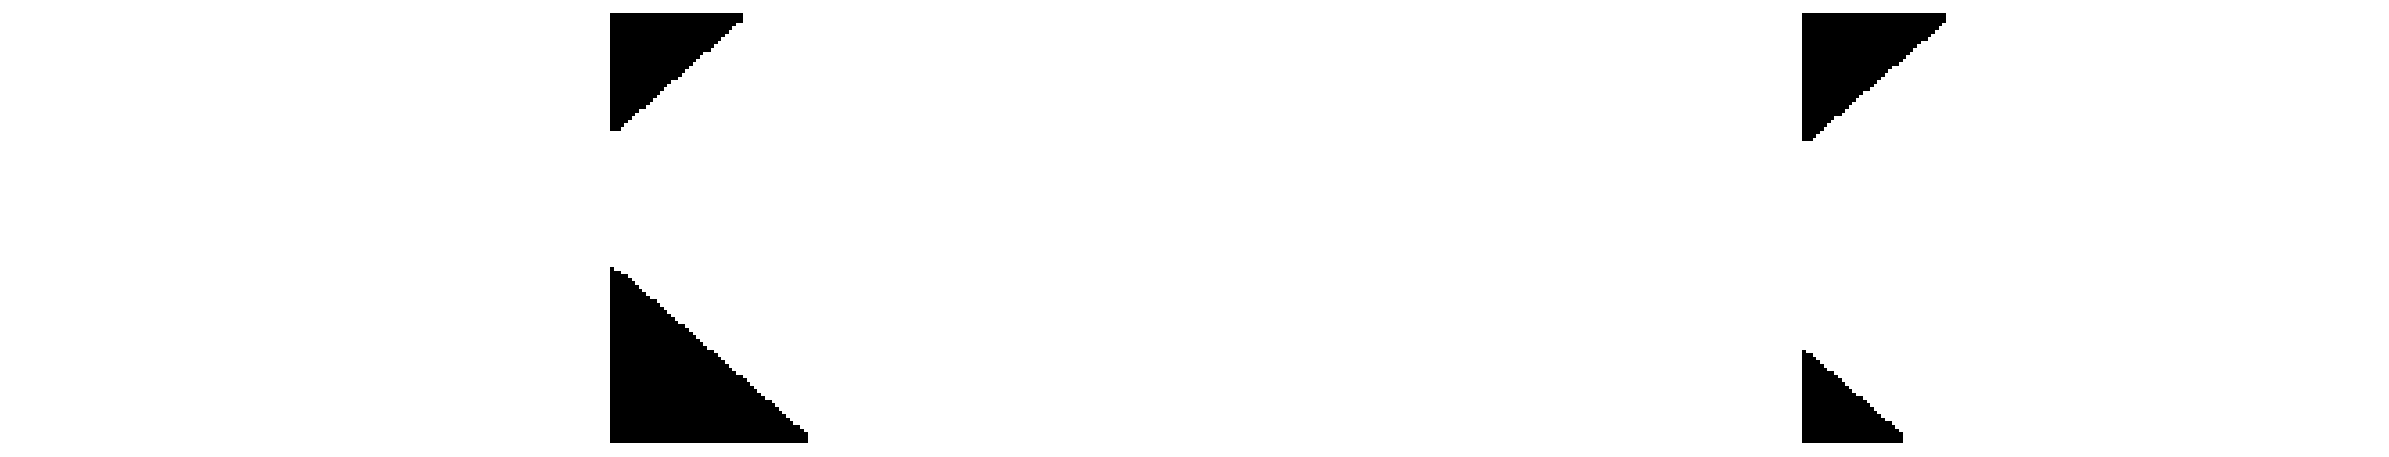

In [10]:
plot_imgs([next(data)['valid_mask'] for _ in range(4)], cmap='gray')

# Without homographic warps

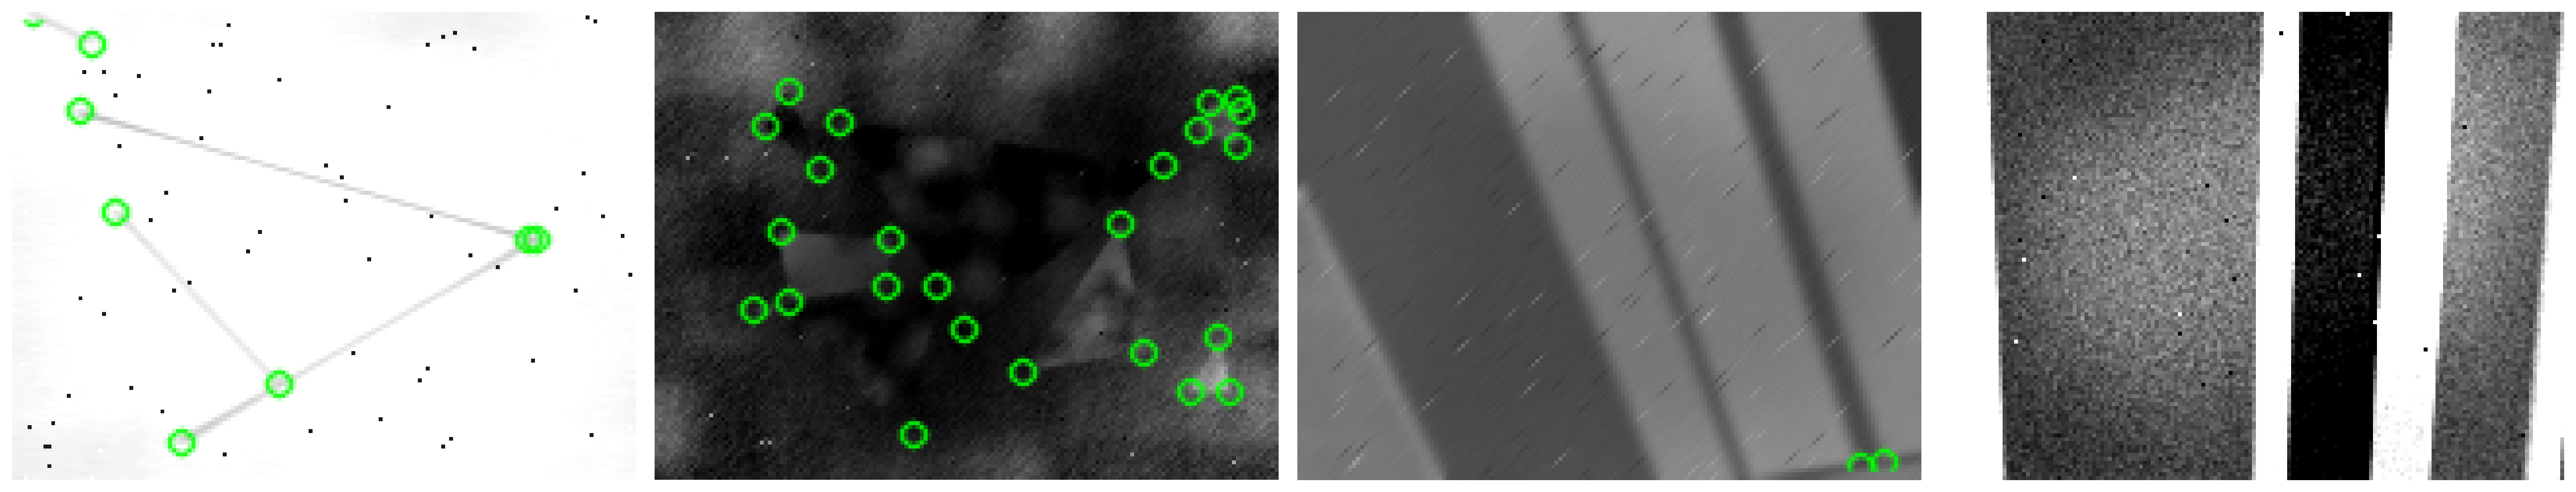

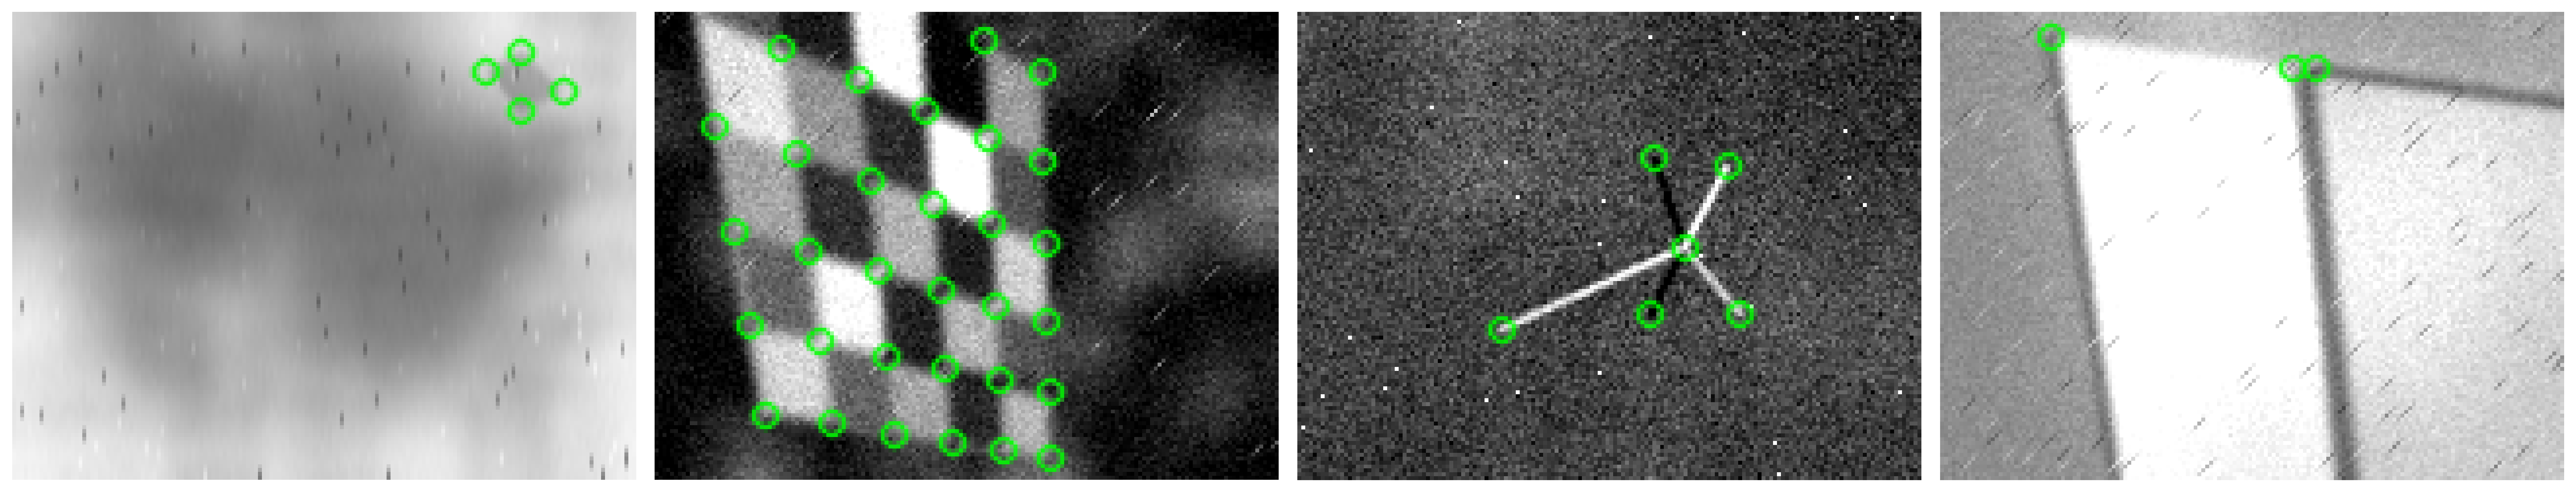

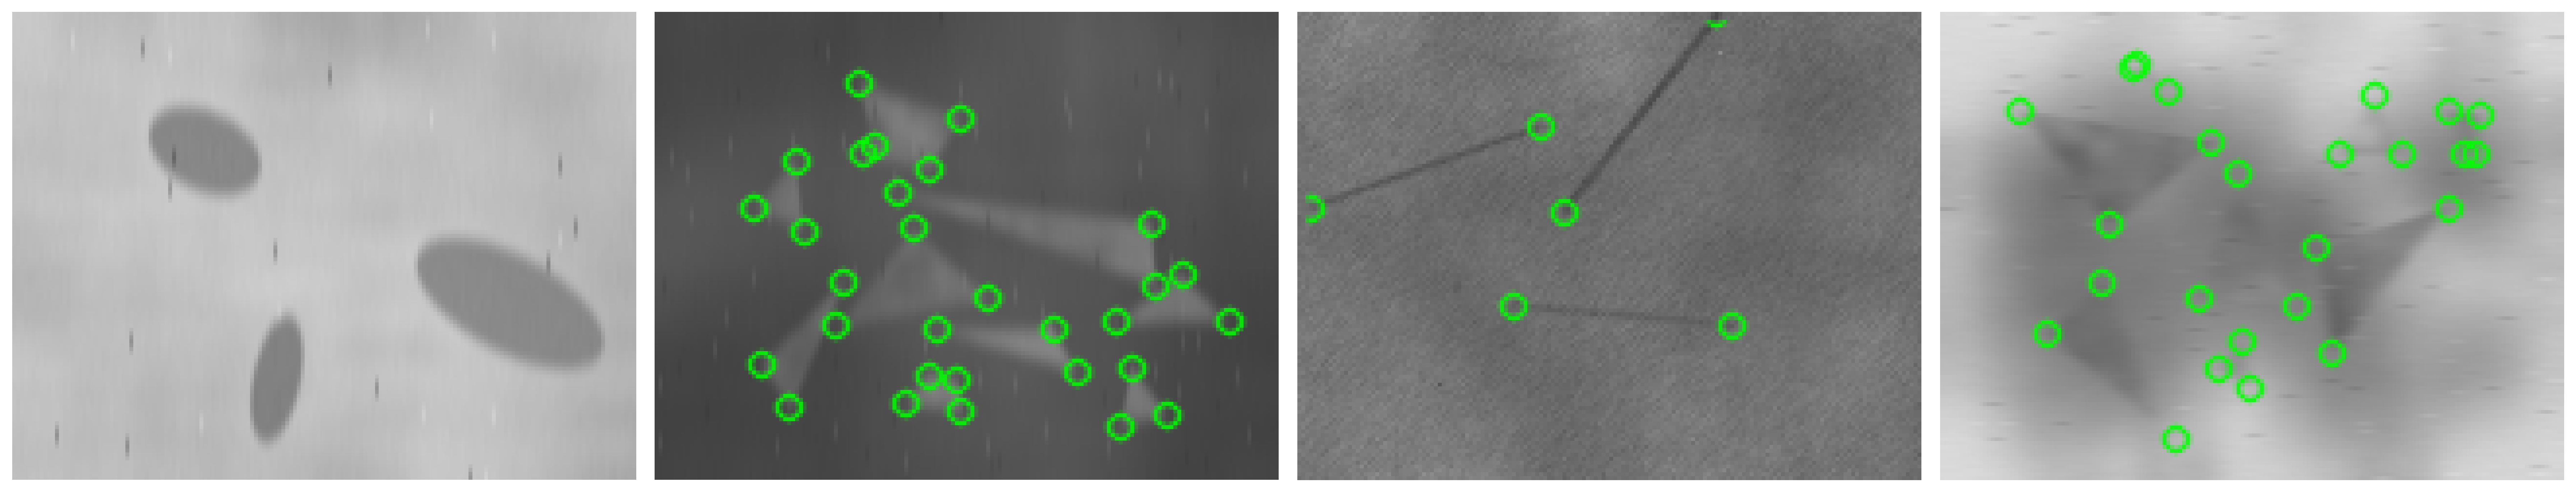

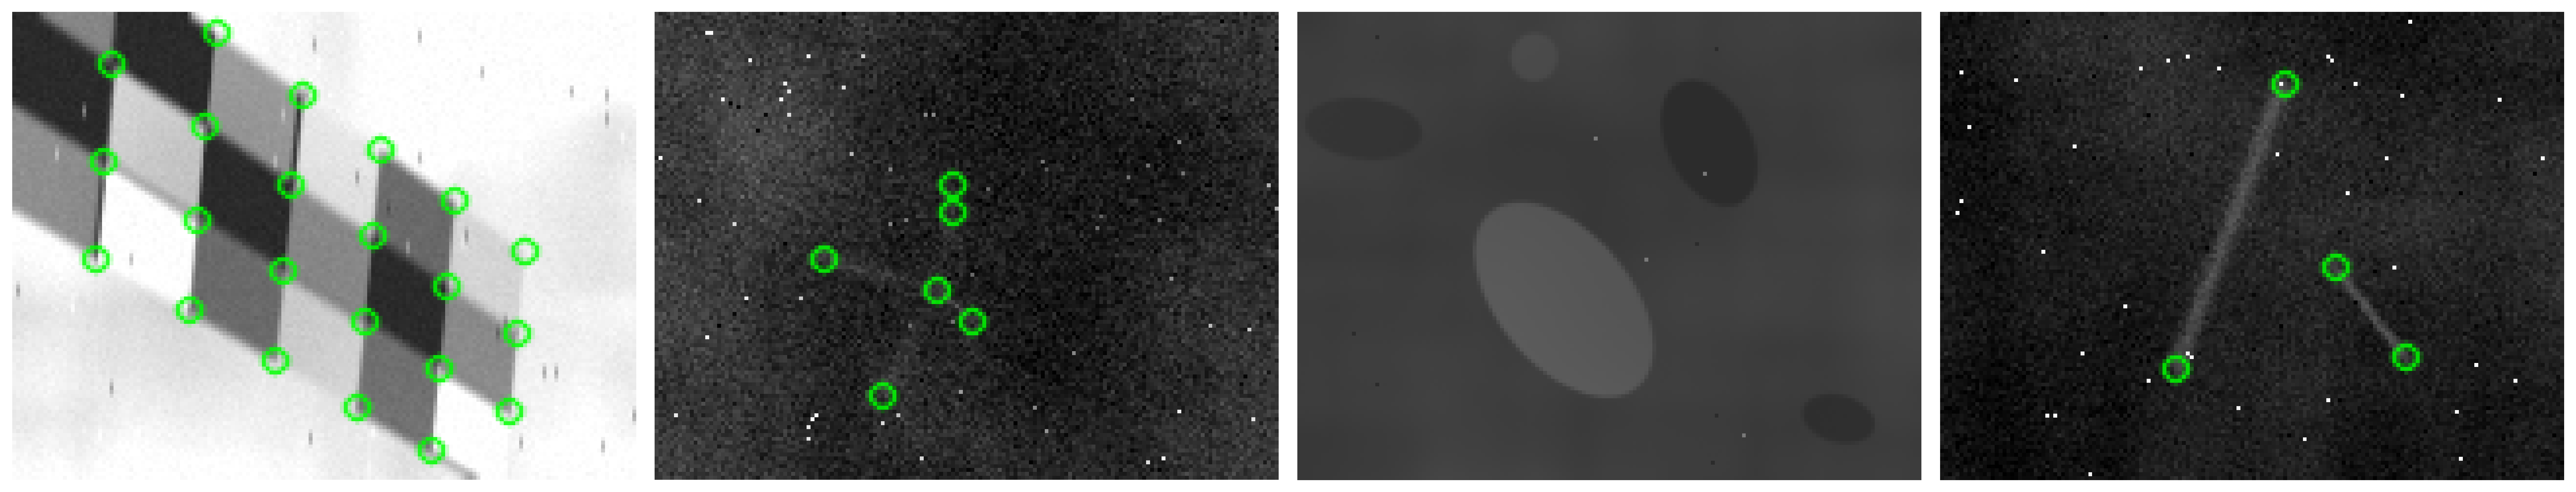

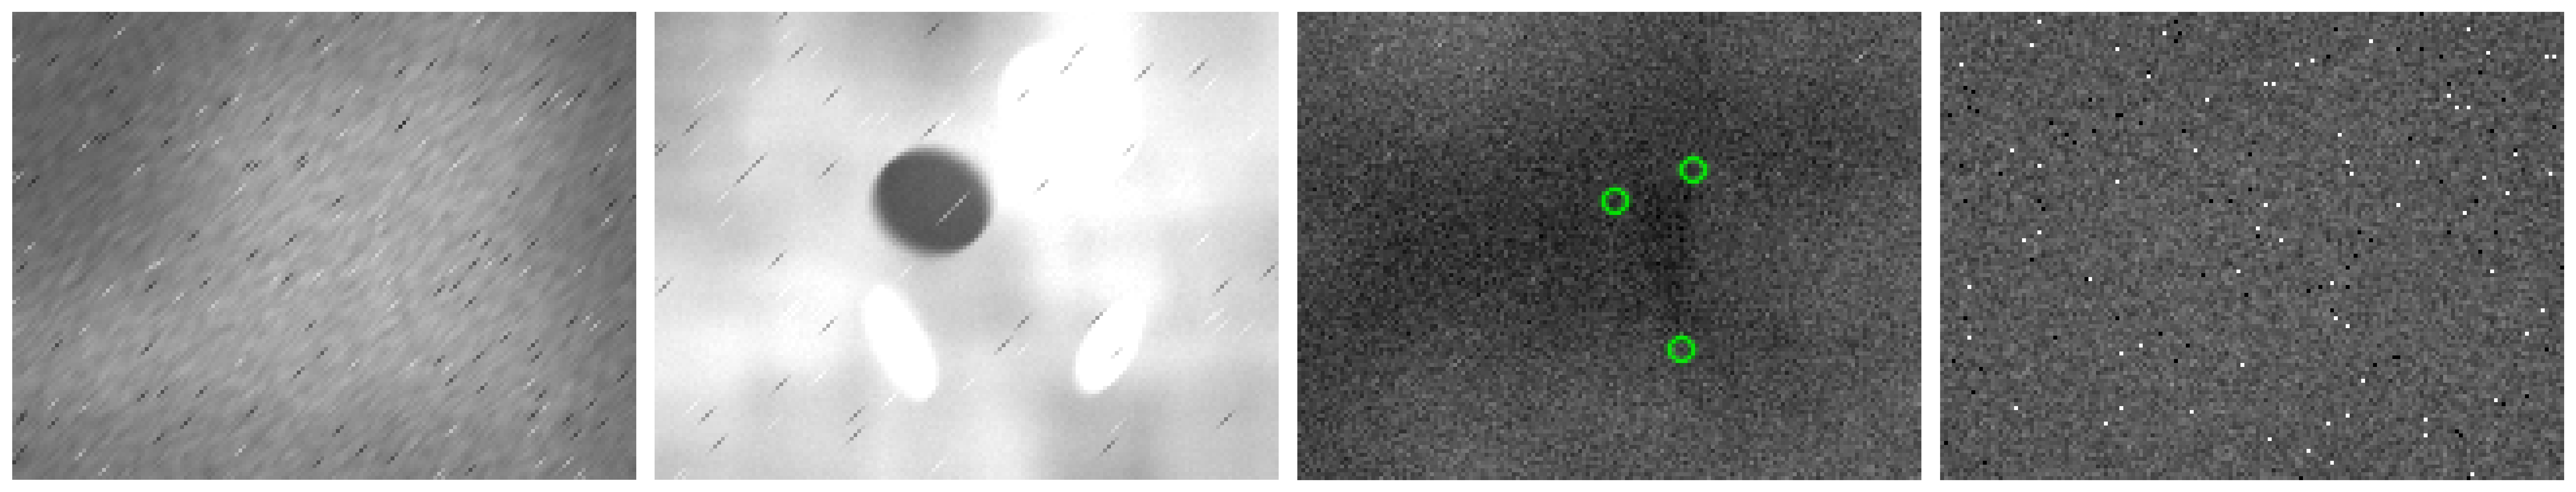

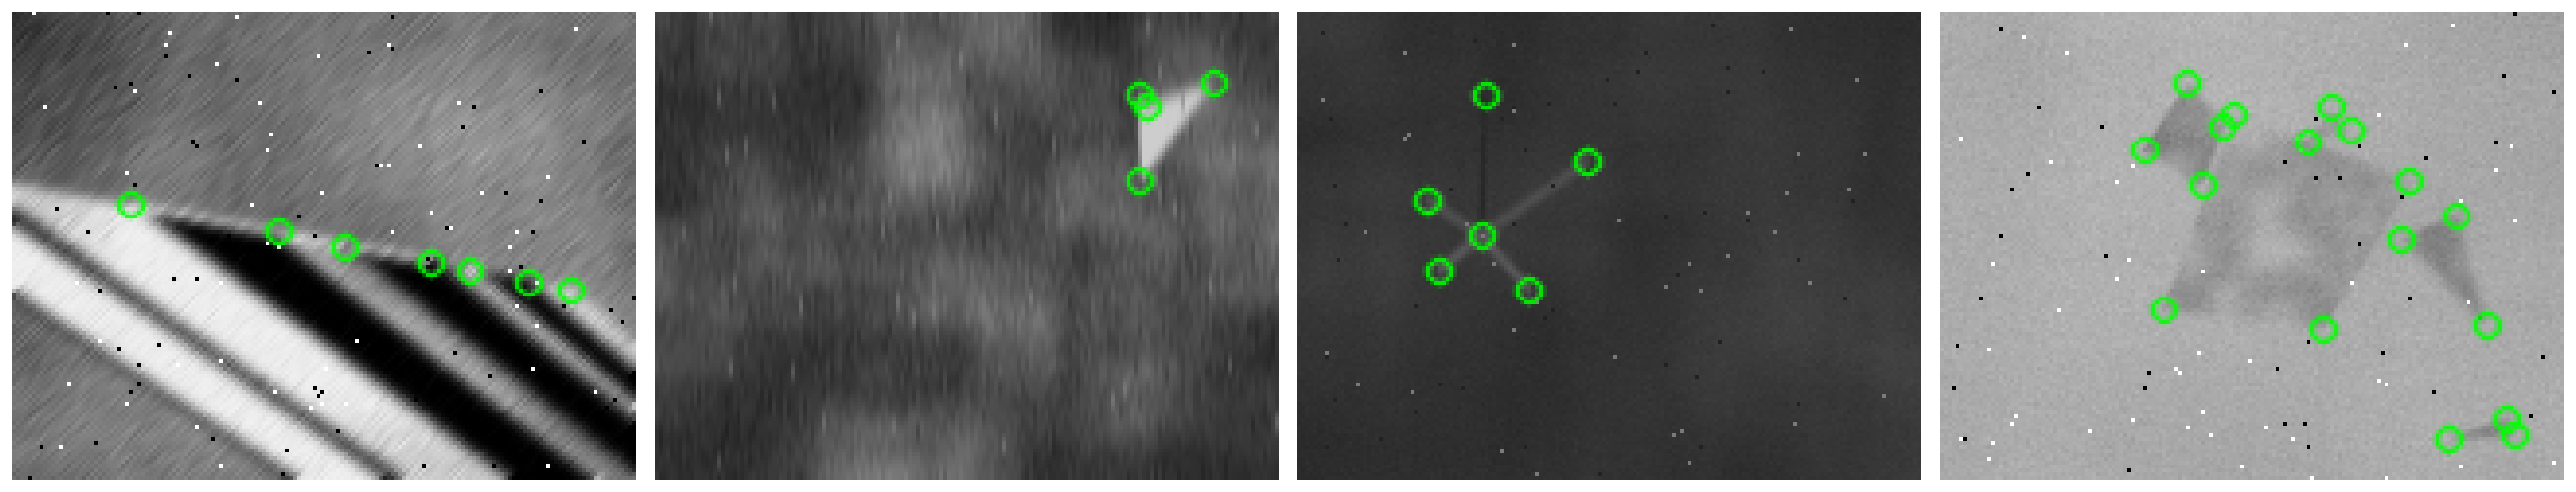

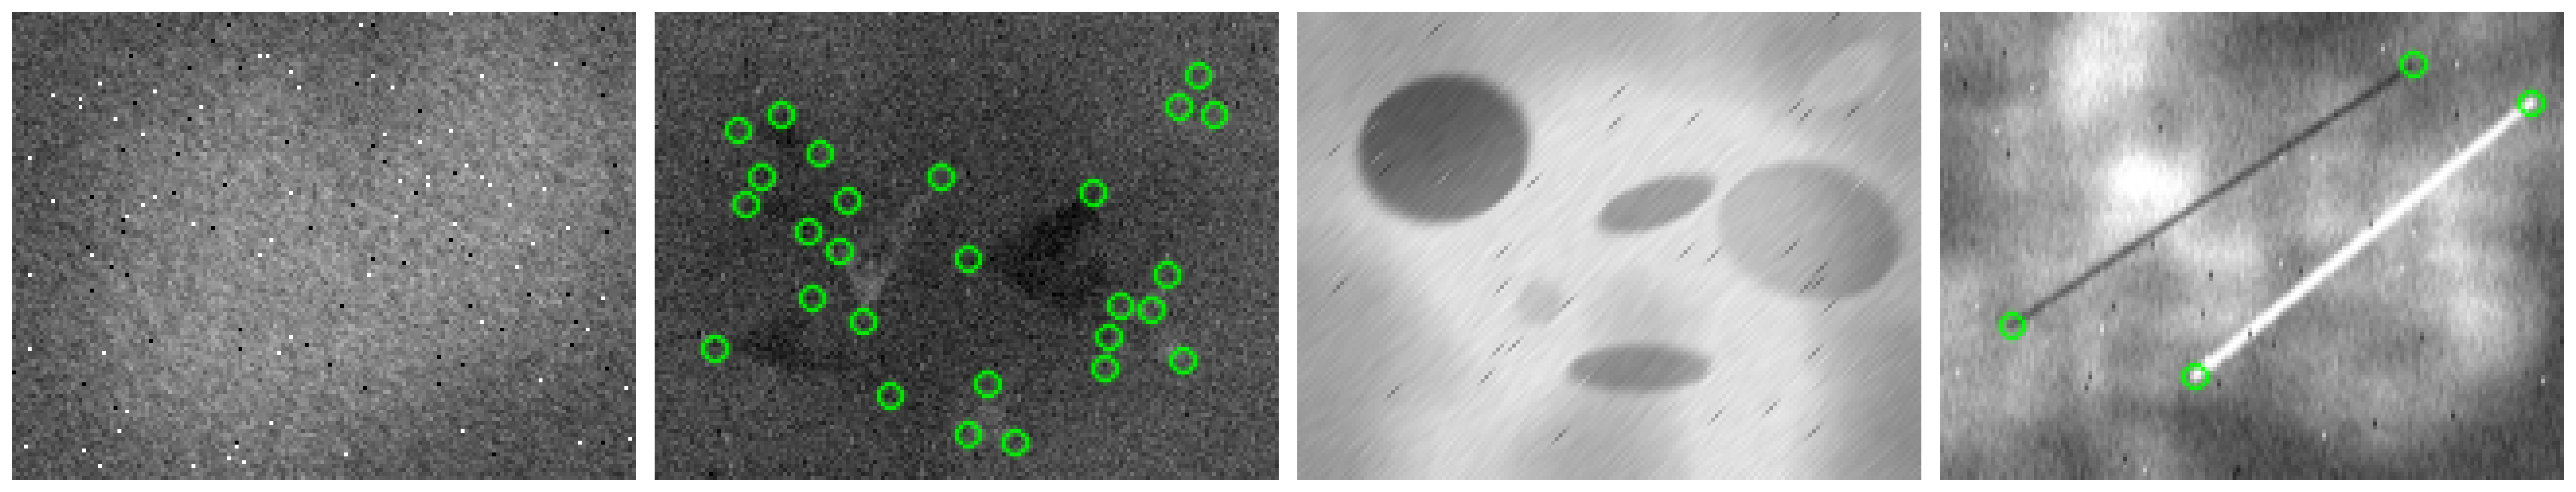

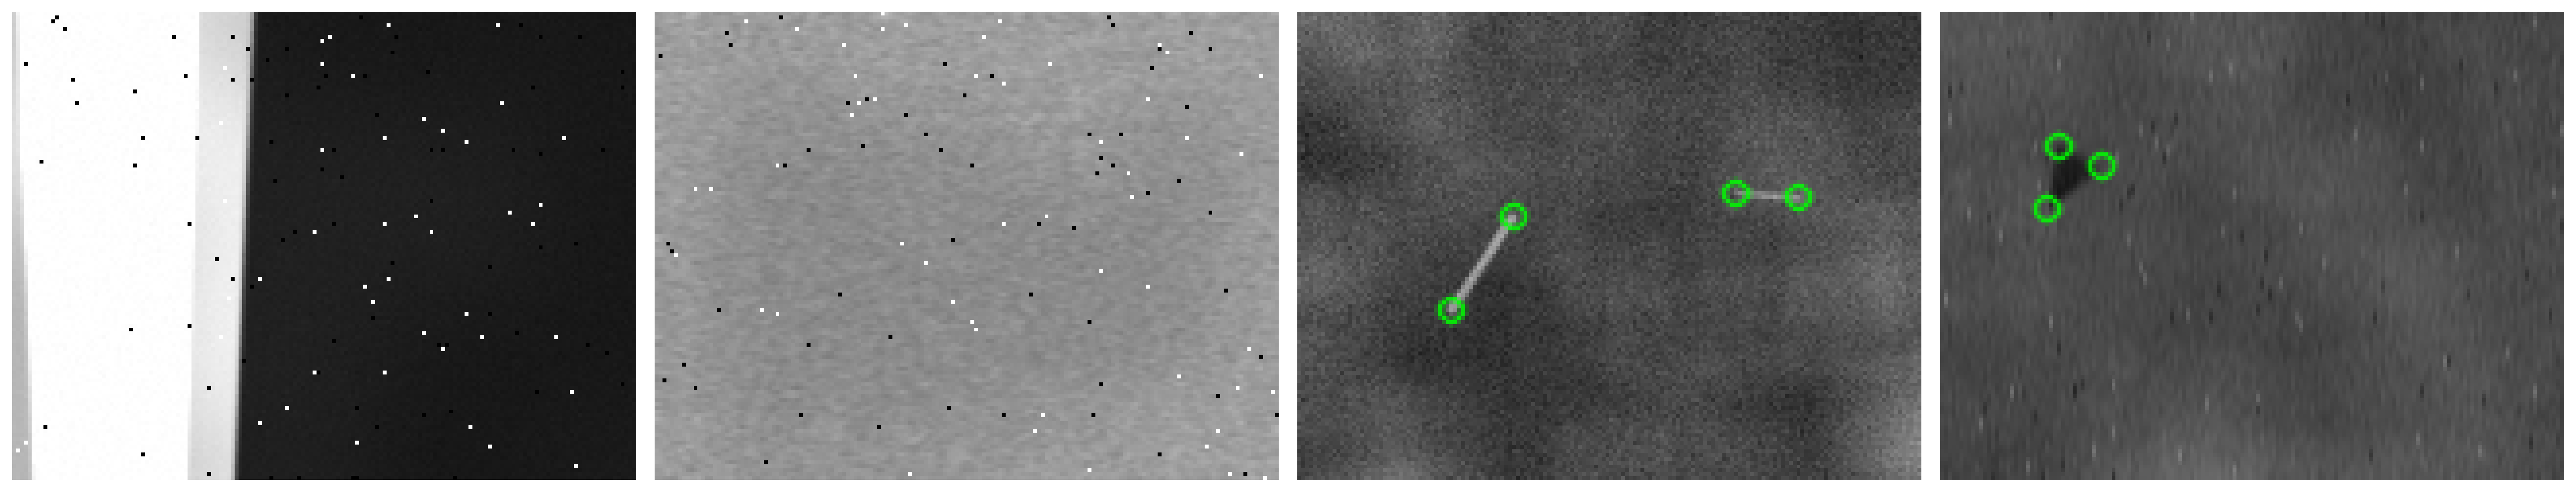